# Predict House Prices in King County using Machine Learning models?
# Get the best accuracy possible and deliver the solution

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The attributes are defined as follows:

1. id: a notation for a house
2. date: Date house was sold
3. price: Price is prediction target
4. bedrooms: Number of Bedrooms/House
5. bathrooms: Number of bathrooms/bedrooms
6. sqft_living: square footage of the home
7. sqft_lots: quare footage of the lot
8. floors: Total floors (levels) in house
9. waterfront: House which has a view to a waterfront
10. view: Has been viewed
11. condition: How good the condition is ( Overall )
12. gradeoverall: grade given to the housing unit, based on King County grading system
13. sqft_above: square footage of house apart from basement
14. sqft_basement: square footage of the basement
15. yr_built: Built Year
16. yr_renovated: Year when house was renovated
17. zipcode: zip
18. lat: Latitude coordinate
19. long: Longitude coordinate
20. sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
21. sqft_lot15: lotSize area in 2015(implies-- some renovations)

## Machine Learning Project Template
#### 1. Prepare Problem
###### 1.1. Load libraries
###### 1.2. Load dataset

##### 2. Summarize Data
###### 2.1. Descriptive statistics
###### 2.2. Data visualizations

##### 3. Prepare Data
###### 3.1. Data Cleaning
###### 3.2. Feature Selection
###### 3.3. Data Transforms

##### 4. Evaluate Algorithms
###### 4.1. Split-out validation dataset
###### 4.2. Test options and test metric
###### 4.3. Spot Check Algorithms
###### 4.4. Compare Algorithms

##### 5. Improve Accuracy
###### 5.1. Algorithm Tuning
###### 5.2. Ensembles

##### 6. Finalize Model
###### 6.1. Predictions on validation dataset
###### 6.2. Create standalone model on entire training dataset
###### 6.3. Save model for later use

# Problem Definition

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load libraries
import numpy
import pandas as pd
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

# Analyze Data

In [4]:
data = read_csv('kc_house_data.csv')

In [7]:
data.head(5).T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


# Descriptive Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [14]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data['bathrooms'] = data['bathrooms'].astype('int64')
data['floors'] = data['floors'].astype('int64')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null int64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null int64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(17)
memory usage: 3.5 MB


In [20]:
data = data.drop('id', axis=1)

In [21]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
print(data.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      1.749734   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.734873    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.000000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.446213      0.007542      0.234303      3.409430      7.656873   
std        0.551894      0.086517      0.766318    

# Data Visualizations

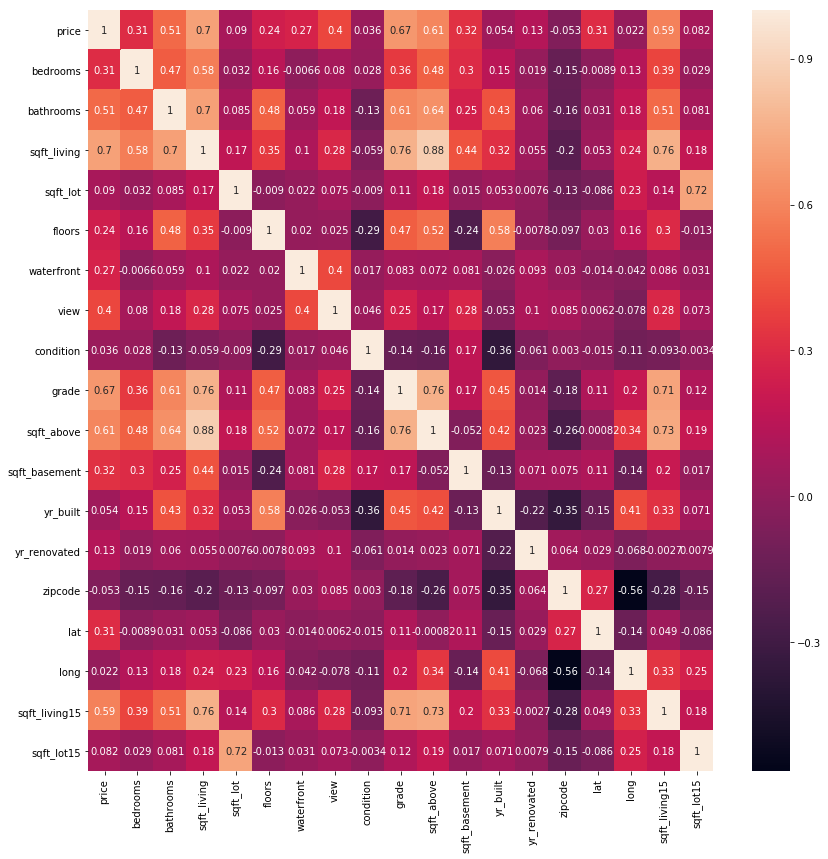

In [25]:
corrmat = data.corr()
pyplot.subplots(figsize = (14,14))
sn.heatmap(corrmat, annot=True)

In [ ]:
From above correlation heat map:
    * Sales price is good correlated with sqft living,sqft above, grade, number of bathrooms and bedrooms
    *Number pf Bedroom and bathrrom have good correlation with sqt and grade
    *Grade has good correlation with sqft living and sqft lot and also with price

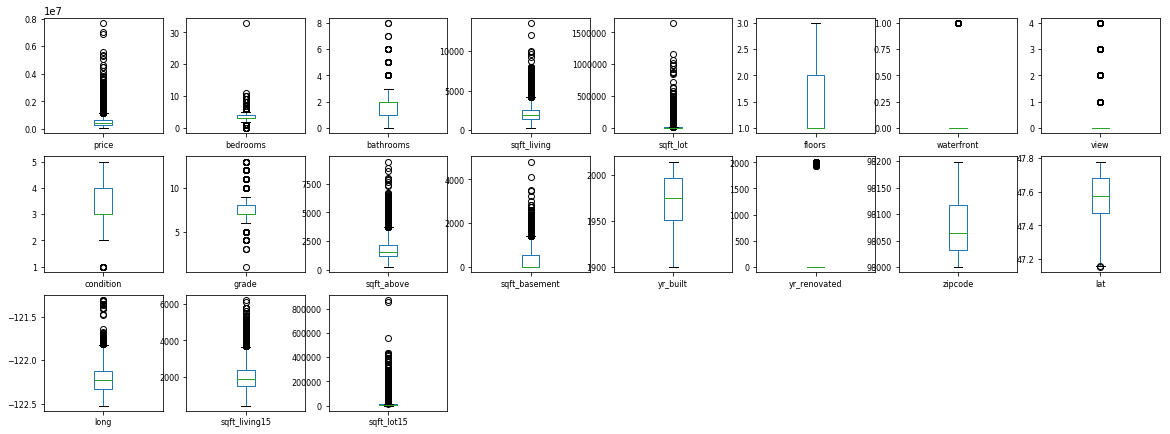

In [33]:
# box and whisker plots
#data_wo_date=data.drop('date',axis=1)
data_wo_date.plot(kind='box', subplots=True, layout=(8,8), fontsize=8, figsize=(20,20))
pyplot.show()

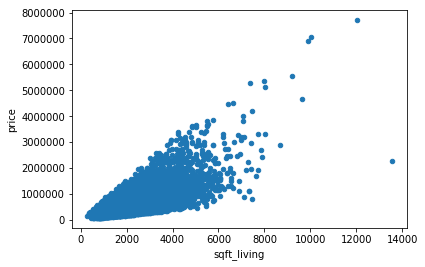

In [36]:
#scatter plot sqft_living/saleprice
var = 'sqft_living'
df = pd.concat([data['price'], data[var]], axis=1)
df.plot.scatter(x=var, y='price');

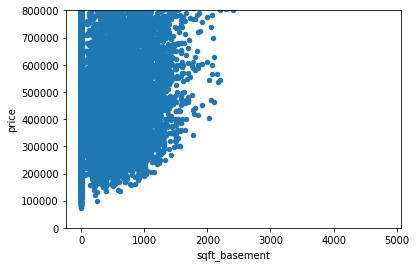

In [38]:
#scatter plot sqft_basement/price
var = 'sqft_basement'
df = pd.concat([data['price'], data[var]], axis=1)
df.plot.scatter(x=var, y='price',ylim=(0,800000));

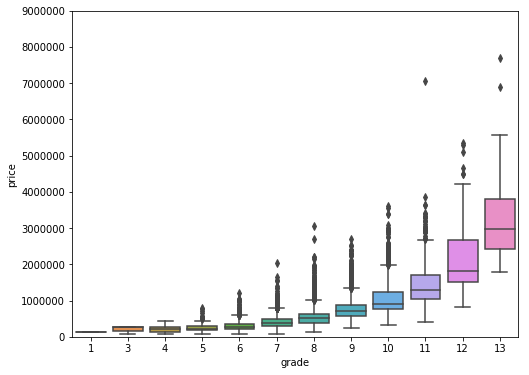

In [48]:
#box plot grade/price
import matplotlib.pyplot as plt
var = 'grade'
df = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sn.boxplot(x=var, y="price", data=df)
fig.axis(ymin=0, ymax=9000000);

# Summary of Ideas

In [ ]:
Useful features to predict the house price will be 
    *Grade
    *Sqft living
    *no of bedrooms
Process like standardization and feature selection along with idetifying hyper-parameters to done in order to tune the model.

# Validation Dataset

In [103]:
# Split-out validation dataset
X1 = data.drop('price', axis=1)
X = X1.drop('date', axis=1)
y = data[['price']]
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [104]:
X_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
20046,3,2,2480,4136,2,0,0,3,8,2480,0,2009,0,98059,47.4930,-122.147,2510,4314
7278,3,2,2060,10650,1,0,0,5,8,1050,1010,1976,0,98006,47.5627,-122.137,2690,8850


# Evaluate Algorithms: Baseline

In [150]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'r2'

In [151]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))

In [152]:
models

[('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
           normalize=False))]

In [154]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.702068 (0.015210)


In [155]:
results

[array([0.69544685, 0.69432448, 0.68968044, 0.71301934, 0.70991673,
        0.67545323, 0.69725058, 0.70978917, 0.73496193, 0.7008342 ])]

In [156]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
y_train_pred = model.predict(X_train)
print('Training accuracy : %.3f' % model.score(X_train, Y_train))

Training accuracy : 0.705


In [158]:
y_test_pred = model.predict(X_test)
print('Testing accuracy : %.3f' % model.score(X_test, Y_test))

Testing accuracy : 0.688


# Feature Selection

In [114]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [116]:
print('Training dataset shape:', X_train.shape, Y_train.shape)
print('Testing dataset shape:', X_test.shape, Y_test.shape)

Training dataset shape: (17290, 18) (17290, 1)
Testing dataset shape: (4323, 18) (4323, 1)


In [117]:
# Build Lin Reg  to use in feature selection
linR = LinearRegression()
# Build step forward feature selection
sfs1 = sfs(linR, k_features=5, forward=True, scoring='r2', cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train, Y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.49275337, 0.51902847, 0.48428626, 0.47133882, 0.49457319]),
  'avg_score': 0.49239602199464694,
  'feature_names': ('sqft_living',),
  'ci_bound': 0.020104260170196956,
  'std_dev': 0.01564179742020798,
  'std_err': 0.007820898710103988},
 2: {'feature_idx': (2, 14),
  'cv_scores': array([0.56439966, 0.5758148 , 0.5664716 , 0.55505394, 0.57536653]),
  'avg_score': 0.5674213088376595,
  'feature_names': ('sqft_living', 'lat'),
  'ci_bound': 0.009898598634045297,
  'std_dev': 0.007701446025216608,
  'std_err': 0.003850723012608304},
 3: {'feature_idx': (2, 6, 14),
  'cv_scores': array([0.61461612, 0.6193695 , 0.59864842, 0.6023941 , 0.61913286]),
  'avg_score': 0.6108321994822911,
  'feature_names': ('sqft_living', 'view', 'lat'),
  'ci_bound': 0.011142078718674791,
  'std_dev': 0.008668915776163782,
  'std_err': 0.004334457888081891},
 4: {'feature_idx': (2, 6, 8, 14),
  'cv_scores': array([0.6442171 , 0.63081101, 0.63291286, 0.62988147,

In [118]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)


[2, 6, 8, 11, 14]


In [119]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['sqft_living', 'view', 'grade', 'yr_built', 'lat']


In [120]:
linR = LinearRegression()
linR.fit(X_train[subsetColumnList], Y_train)
y_train_pred = linR.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(X_train[subsetColumnList], Y_train))

Training accuracy on selected features: 0.669


In [121]:
y_test_pred = linR.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(X_test[subsetColumnList], Y_test))

Testing accuracy on selected features: 0.655


# Evaluate Algorithms: Standardization

In [177]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))

In [178]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
scaler.mean_

array([ 3.37408907e+00,  1.75268942e+00,  2.08543725e+03,  1.49493869e+04,
        1.44742626e+00,  7.63447079e-03,  2.31347600e-01,  3.40827068e+00,
        7.65789474e+00,  1.79325934e+03,  2.92177906e+02,  1.97103557e+03,
        8.63204164e+01,  9.80775582e+04,  4.75596676e+01, -1.22213110e+02,
        1.98706940e+03,  1.26063912e+04])

In [179]:
X_train.mean(axis=0)

bedrooms             3.374089
bathrooms            1.752689
sqft_living       2085.437247
sqft_lot         14949.386871
floors               1.447426
waterfront           0.007634
view                 0.231348
condition            3.408271
grade                7.657895
sqft_above        1793.259341
sqft_basement      292.177906
yr_built          1971.035570
yr_renovated        86.320416
zipcode          98077.558242
lat                 47.559668
long              -122.213110
sqft_living15     1987.069404
sqft_lot15       12606.391151
dtype: float64

In [180]:
scaler.scale_

array([9.36021382e-01, 7.36022635e-01, 9.21411180e+02, 3.90051945e+04,
       5.51285918e-01, 8.70412870e-02, 7.63034398e-01, 6.50266542e-01,
       1.18100073e+00, 8.29257250e+02, 4.45577630e+02, 2.94333325e+01,
       4.05948793e+02, 5.34266435e+01, 1.38281056e-01, 1.41505901e-01,
       6.85030786e+02, 2.59443248e+04])

In [181]:
X_train.std(axis=0)

bedrooms             0.936048
bathrooms            0.736044
sqft_living        921.437827
sqft_lot         39006.322480
floors               0.551302
waterfront           0.087044
view                 0.763056
condition            0.650285
grade                1.181035
sqft_above         829.281231
sqft_basement      445.590516
yr_built            29.434184
yr_renovated       405.960533
zipcode             53.428189
lat                  0.138285
long                 0.141510
sqft_living15      685.050597
sqft_lot15       25945.075099
dtype: float64

In [183]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, scaled_data, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.701722 (0.015407)


In [185]:
model.fit(scaled_data,Y_train)
print('Training accuracy after standardization: %.3f' % model.score(scaled_data, Y_train))

Training accuracy after standardization: 0.705


In [ ]:
Inferences
* Price of the house has good correlation with 'features': 'sqft_living', 'view', 'grade', 'yr_built', 'number of bedrooms'.
* Linear regression model is built with r2 scoring method in cross validation with 10 folds.
*Feature selection process is explored.
* Affirming that data points lacks information so that even after feature selction, cross validation and standardization the accuracy doesnot increase way beyond.
